# Time Series and Machine Learning Primer
> This chapter is an introduction to the basics of machine learning, time series data, and the intersection between the two. This is the Summary of lecture "Machine Learning for Time Series Data in Python", via datacamp.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('fivethirtyeight')

## Timeseries kinds and applications


### Plotting a time series (I)
In this exercise, you'll practice plotting the values of two time series without the time component.

In [2]:
data = pd.read_csv('data.csv', index_col=0)
data2 = pd.read_csv('data2.csv', index_col=0)

In [ ]:
# Print the first 5 rows of data
print(data.head(5))

In [ ]:
# Print the first 5 rows of data2
print(data2.head(5))

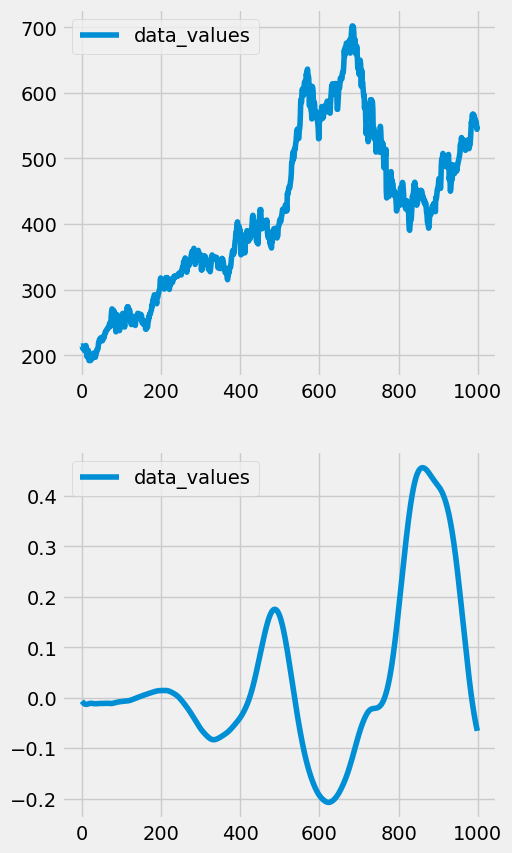

In [4]:
# Plot the time series in each dataset
fig, axs = plt.subplots(2, 1, figsize=(5, 10))
data.iloc[:1000].plot(y='data_values', ax=axs[0]);
data2.iloc[:1000].plot(y='data_values', ax=axs[1]);
plt.show()

### Plotting a time series (II)
You'll now plot both the datasets again, but with the included time stamps for each (stored in the column called "time"). Let's see if this gives you some more context for understanding each time series data.

In [6]:
data = pd.read_csv('data_time.csv', index_col=0)
data2 = pd.read_csv('data_time2.csv', index_col=0)

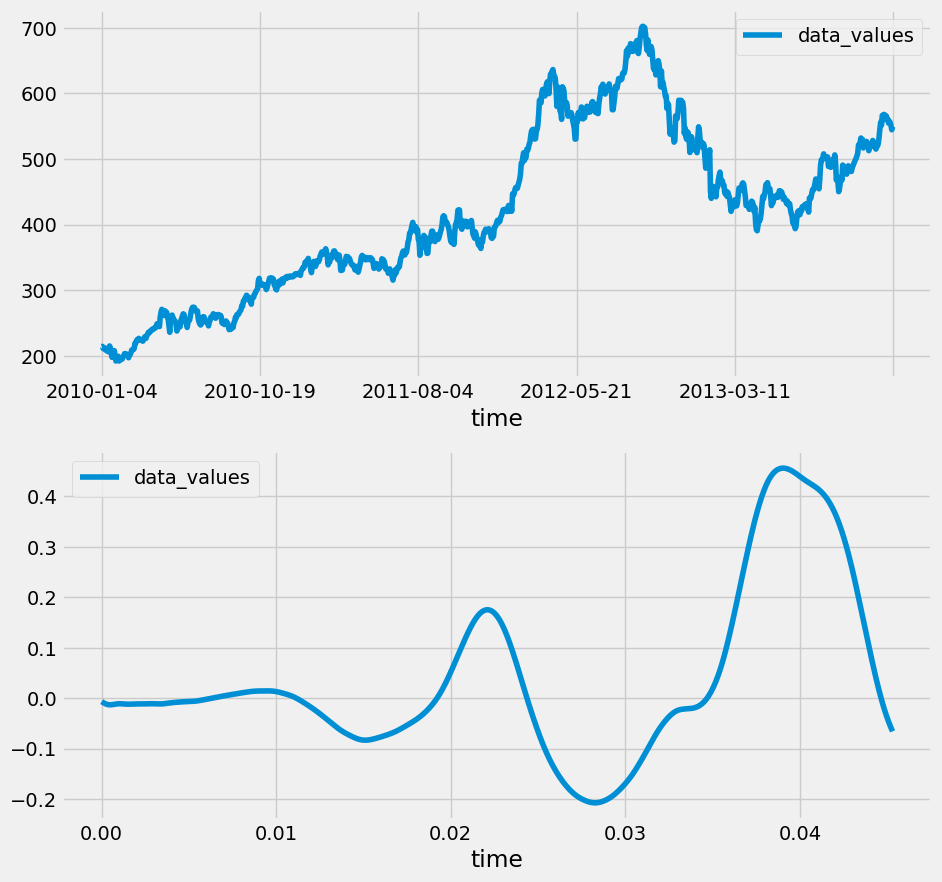

In [7]:
# Plot the time series in each dataset
fig, axs = plt.subplots(2, 1, figsize=(10, 10));
data.iloc[:1000].plot(x='time', y='data_values', ax=axs[0]);
data2.iloc[:1000].plot(x='time', y='data_values', ax=axs[1]);

## Machine Learning Basics
- Preparing data for scikit-learn
    - ```scikit-learn``` expects a particular structure of data: (samples, features)
    - Make sure that your data is at least two-dimensional
    - Make sure the first dimension is samples

In [8]:
data = pd.read_csv('iris_tsa.csv', index_col=0)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


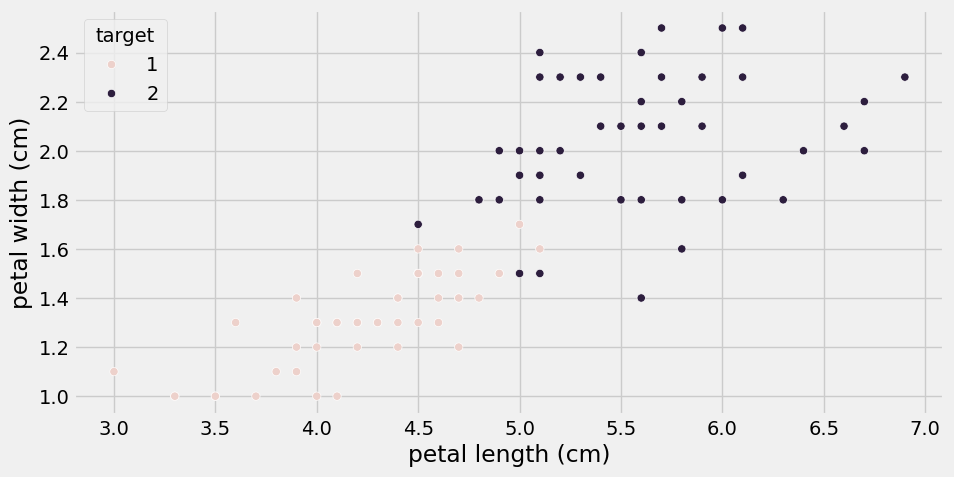

In [9]:
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='target', data=data);

In [10]:
from sklearn.svm import LinearSVC

# Construct data for the model
X = data[['petal length (cm)', 'petal width (cm)']]
y = data[['target']]

# Fit the model
model = LinearSVC()
model.fit(X, y)

c:\Users\yeiso\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\yeiso\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

### Predicting using a classification model
Now that you have fit your classifier, let's use it to predict the type of flower (or class) for some newly-collected flowers.

Using the classifier you fit, you'll predict the type of each flower.

In [12]:
targets = pd.read_csv('iris_target.csv', index_col=0)

[2 2 2 1 1 2 2 2 2 1 2 1 1 2 1 1 2 1 2 2]


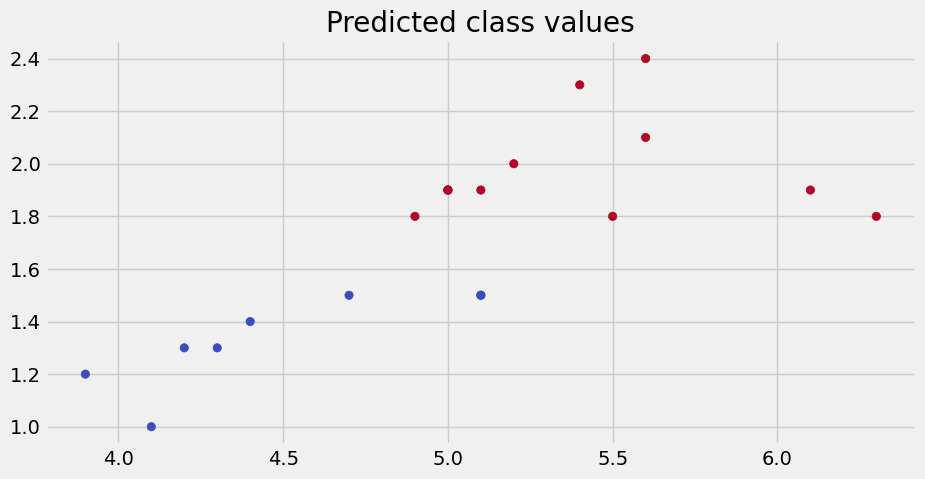

In [14]:
# Create input array
X_predict = targets[['petal length (cm)', 'petal width (cm)']]

# Predict with the model
predictions = model.predict(X_predict)
print(predictions)

# Visualize predictions and actual values
plt.scatter(X_predict['petal length (cm)'], X_predict['petal width (cm)'],
            c=predictions, cmap=plt.cm.coolwarm)
plt.title("Predicted class values")
plt.show()

### Fitting a simple model: regression
In this exercise, you'll practice fitting a regression model using data from the Boston housing market.

In [16]:
boston = pd.read_csv('boston.csv', index_col=0)

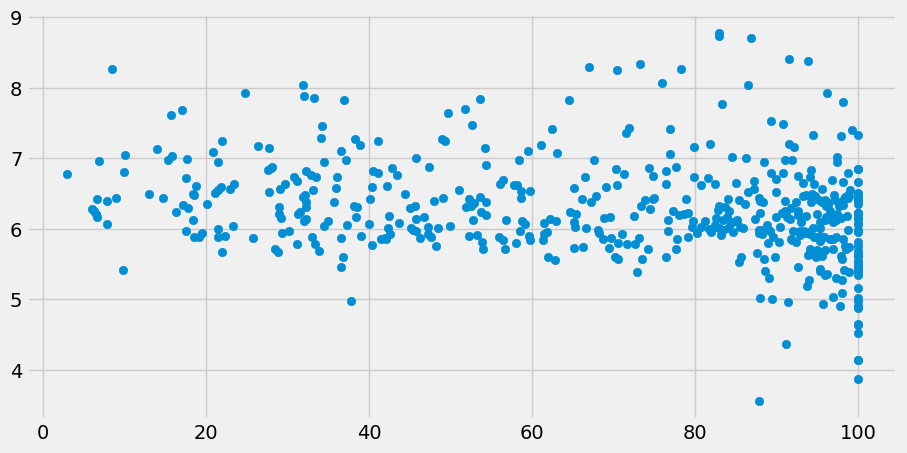

In [17]:
plt.scatter(boston['AGE'], boston['RM']);

In [20]:
from sklearn import linear_model

# Prepare input and output DataFrame
X = boston[['AGE']]
y = boston[['RM']]

# Fit the model
model = linear_model.LinearRegression()
model.fit(X, y)

LinearRegression()

### Predicting using a regression model
Now that you've fit a model with the Boston housing data, lets see what predictions it generates on some new data. You can investigate the underlying relationship that the model has found between inputs and outputs by feeding in a range of numbers as inputs and seeing what the model predicts for each input.

In [21]:
new_inputs = np.array(pd.read_csv('boston_newinputs.csv', index_col=0, header=None).values)

c:\Users\yeiso\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


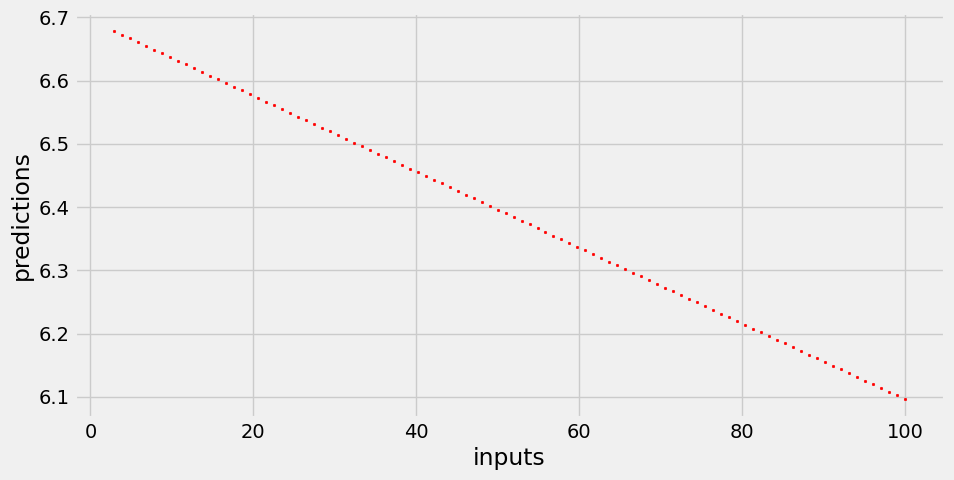

In [23]:
# Generate predictions with the model using those inputs
predictions = model.predict(new_inputs.reshape(-1, 1))

# Visualize the inputs and predicted values
plt.scatter(new_inputs, predictions, color='r', s=3)
plt.xlabel('inputs')
plt.ylabel('predictions')
plt.show()

## Machine learning and time series data


### Inspecting the classification data
In these final exercises of this chapter, you'll explore the two datasets you'll use in this course.

The first is a collection of heartbeat sounds. Hearts normally have a predictable sound pattern as they beat, but some disorders can cause the heart to beat abnormally. This dataset contains a training set with labels for each type of heartbeat, and a testing set with no labels. You'll use the testing set to validate your models.

As you have labeled data, this dataset is ideal for classification. In fact, it was originally offered as a part of a [public Kaggle competition](https://www.kaggle.com/kinguistics/heartbeat-sounds).

In [60]:
import librosa as lr
from glob import glob

# data_dir = '\archive\set_a'

# # List all the wav files in the folder
# audio_files = glob(data_dir + '*.wav')

audio_files = glob('audio_munged.hdf5')

# Read in the first audio file, create the time array
audio, sfreq = lr.load(audio_files[0])
time = np.arange(0, len(audio)) / sfreq

# Plot audio over time
fig, ax = plt.subplots()
ax.plot(time, audio)
ax.set(xlabel='Time (s)', ylabel='Sound Amplitude')
plt.show()

C:\Users\yeiso\AppData\Local\Temp\ipykernel_32304\3604153400.py:12: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sfreq = lr.load(audio_files[0])
c:\Users\yeiso\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


NoBackendError: 

### Inspecting the regression data
The next dataset contains information about company market value over several years of time. This is one of the most popular kind of time series data used for regression. If you can model the value of a company as it changes over time, you can make predictions about where that company will be in the future. This dataset was also originally provided as part of a [public Kaggle competition](https://www.kaggle.com/dgawlik/nyse).

In this exercise, you'll plot the time series for a number of companies to get an understanding of how they are (or aren't) related to one another.

                  AAPL  FB       NFLX          V        XOM
time                                                       
2010-01-04  214.009998 NaN  53.479999  88.139999  69.150002
2010-01-05  214.379993 NaN  51.510001  87.129997  69.419998
2010-01-06  210.969995 NaN  53.319999  85.959999  70.019997
2010-01-07  210.580000 NaN  52.400001  86.760002  69.800003
2010-01-08  211.980005 NaN  53.300002  87.000000  69.519997


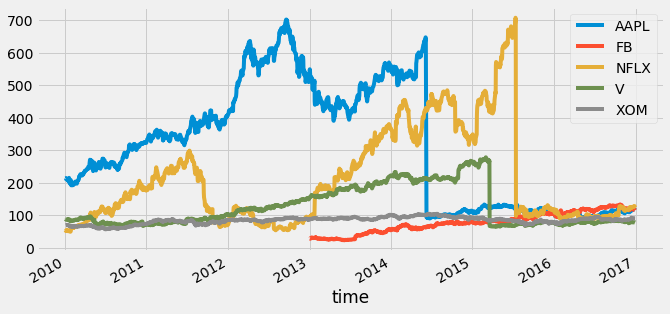

In [55]:
# Read in the data
data = pd.read_csv('./dataset/prices_nyse.csv', index_col=0)

# Convert the index of the DataFrame to datetime
data.index = pd.to_datetime(data.index)
print(data.head())

# Loop through each column, plot its values over time
fig, ax = plt.subplots();
for column in data.columns:
    data[column].plot(ax=ax, label=column);
ax.legend();